In [302]:
import pandas as pd

In [303]:
df = pd.read_csv('Book1.csv')

In [304]:
df.head()

,Month,Sale
0,2021-01,266.0
1,2021-02,145.9
2,2021-03,183.1
3,2021-04,119.3
4,2021-05,180.3


In [305]:
df = df.dropna()

<Axes: >

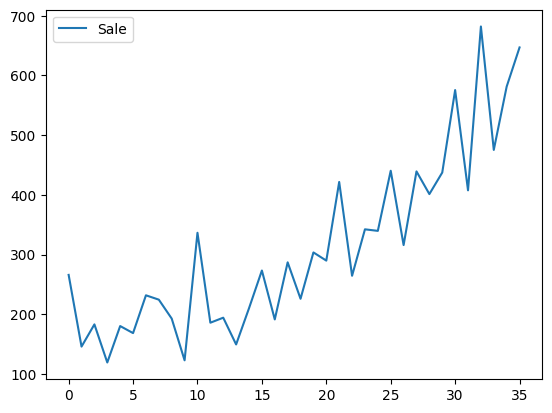

In [306]:
df.plot()

In [307]:
df["Month"] = pd.to_datetime(df["Month"])

<Axes: >

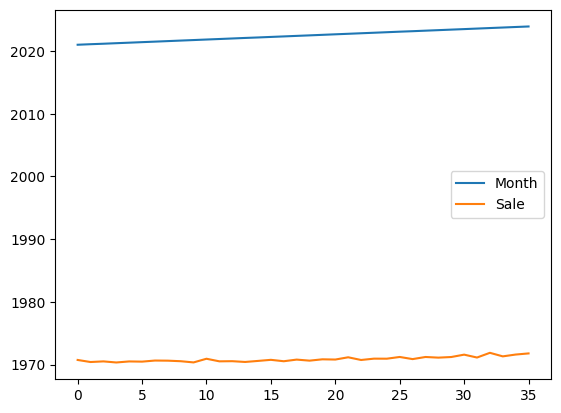

In [308]:
df.plot()

In [309]:
df.head()

,Month,Sale
0,2021-01-01,266.0
1,2021-02-01,145.9
2,2021-03-01,183.1
3,2021-04-01,119.3
4,2021-05-01,180.3


In [310]:
df = df.set_index("Month")

In [311]:
df.head()

,Sale
Month,
2021-01-01,266.0
2021-02-01,145.9
2021-03-01,183.1
2021-04-01,119.3
2021-05-01,180.3


<Axes: xlabel='Month'>

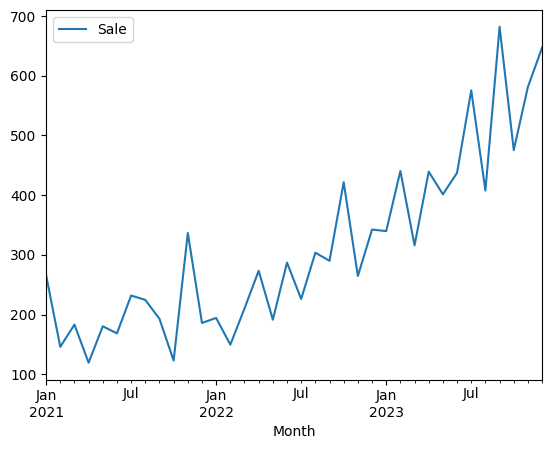

In [312]:
df.plot()

In [313]:
from statsmodels.tsa.stattools import adfuller

In [314]:
print(adfuller(df))

(3.0601420836411775, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.9972644263031)


<Axes: xlabel='Month'>

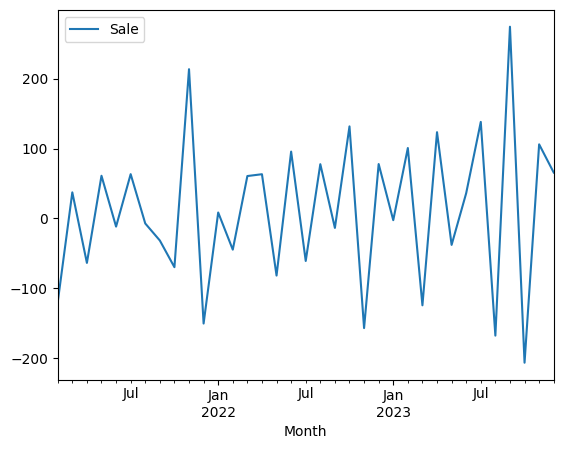

In [315]:
firstorder = df - df.shift(1)
firstorder = firstorder.dropna()
firstorder.plot()

<Axes: xlabel='Month'>

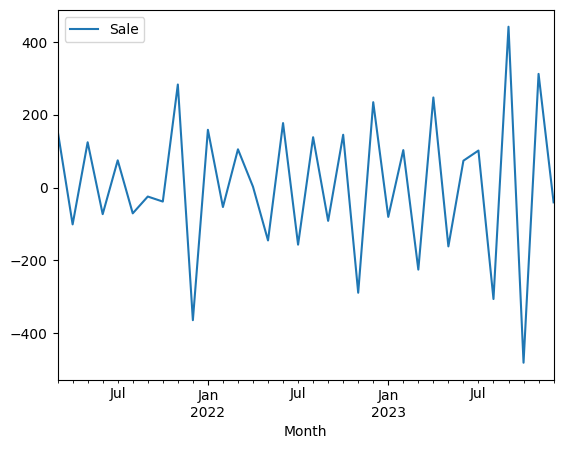

In [316]:
secondorder = firstorder - firstorder.shift(1)
secondorder = secondorder.dropna()
secondorder.plot()

In [317]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

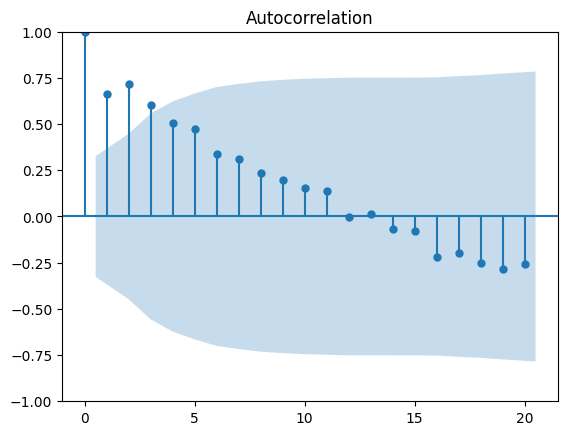

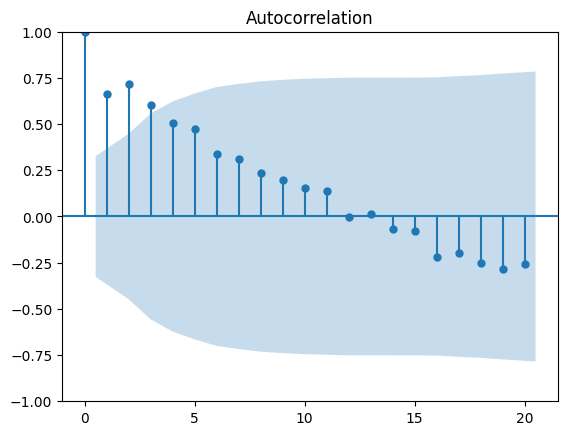

In [318]:
plot_acf(df, lags= 20)

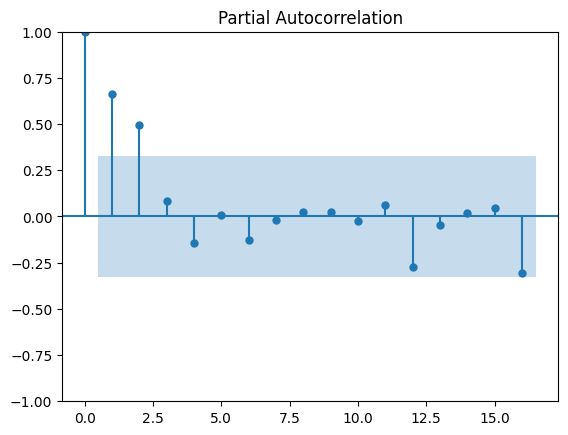

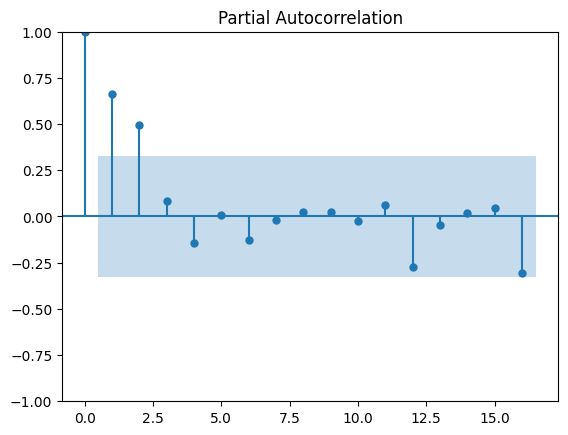

In [319]:
plot_pacf(df)

In [320]:
from statsmodels.tsa.arima.model import ARIMA

In [321]:
size = int(.66 * len(df))


In [322]:
train = df[0: size]
test = df[size:]

In [323]:
model = ARIMA(train, order=(2, 1, 3))

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [324]:
model_fit = model.fit()

In [325]:
predict = model_fit.predict(start=len(train), end= len(df))

In [326]:
print(predict)

2022-12-01    358.914928
2023-01-01    309.091837
2023-02-01    369.733284
2023-03-01    334.296566
2023-04-01    379.653693
2023-05-01    354.578408
2023-06-01    388.586477
2023-07-01    370.953989
2023-08-01    396.520496
2023-09-01    384.217513
2023-10-01    403.493106
2023-11-01    394.992096
2023-12-01    409.569660
2024-01-01    403.768718
Freq: MS, Name: predicted_mean, dtype: float64


In [327]:
import matplotlib.pyplot as plt

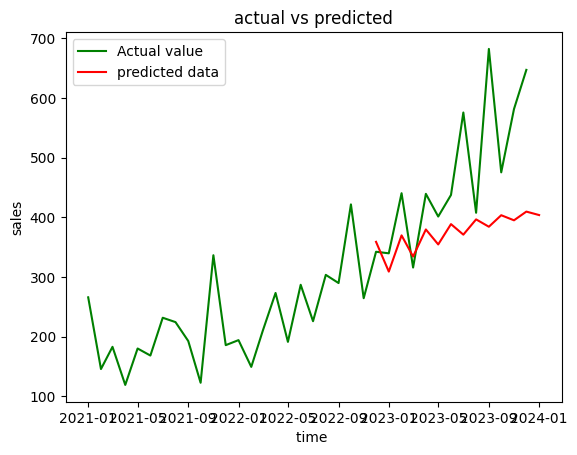

In [328]:
plt.plot(df, color= "green", label="Actual value")
plt.plot(predict, color="red", label="predicted data")
plt.legend()
plt.xlabel("time ")
plt.ylabel("sales")
plt.title("actual vs predicted")
plt.show()

In [329]:
import statsmodels.api as sm

In [330]:
model = sm.tsa.statespace.SARIMAX(train, order=(2, 1, 3), seasonal_order=(2, 1, 3, 24))


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [331]:
model_fit = model.fit()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [332]:
predict = model_fit.predict(start=len(train), end= len(df))

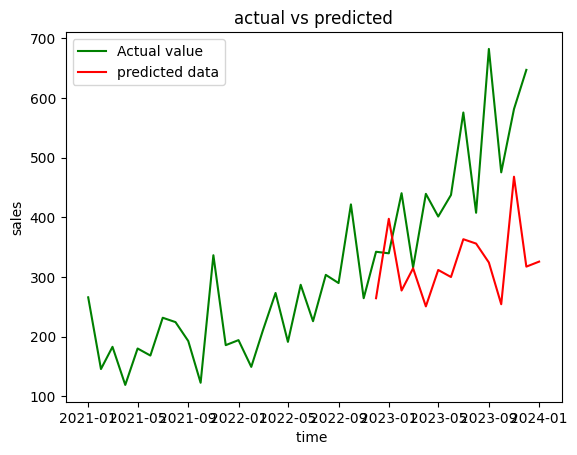

In [333]:
plt.plot(df, color= "green", label="Actual value")
plt.plot(predict, color="red", label="predicted data")
plt.legend()
plt.xlabel("time ")
plt.ylabel("sales")
plt.title("actual vs predicted")
plt.show()

In [334]:
future_predict = model_fit.predict(start=len(df), end= len(df) + 24)

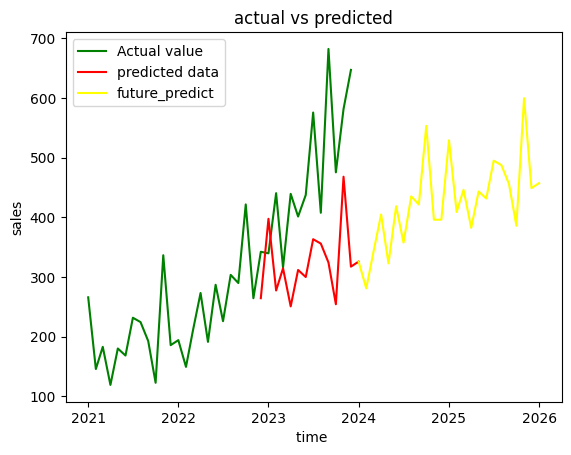

In [335]:
plt.plot(df, color= "green", label="Actual value")
plt.plot(predict, color="red", label="predicted data")
plt.plot(future_predict, color="yellow", label="future_predict")
plt.legend()
plt.xlabel("time ")
plt.ylabel("sales")
plt.title("actual vs predicted")
plt.show()

In [336]:
predict = model_fit.predict(start=len(train), end = len(df) - 1)

In [337]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [338]:
print(predict)

2022-12-01    264.500000
2023-01-01    397.500066
2023-02-01    277.400066
2023-03-01    314.600066
2023-04-01    250.800066
2023-05-01    311.800066
2023-06-01    300.000066
2023-07-01    363.300066
2023-08-01    356.000066
2023-09-01    324.300066
2023-10-01    254.400066
2023-11-01    468.000066
2023-12-01    317.400066
Freq: MS, Name: predicted_mean, dtype: float64


In [339]:
print(test)

             Sale
Month            
2022-12-01  342.3
2023-01-01  339.7
2023-02-01  440.4
2023-03-01  315.9
2023-04-01  439.3
2023-05-01  401.3
2023-06-01  437.4
2023-07-01  575.5
2023-08-01  407.6
2023-09-01  682.0
2023-10-01  475.3
2023-11-01  581.3
2023-12-01  646.9


In [340]:
mse = mean_squared_error(test,predict)

In [343]:
print(mse)

34171.54074275948


In [344]:
rmse = mse**0.5

In [345]:
print(rmse)

184.85545905587824
